In [15]:
import os
import sys
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib
from matplotlib import pyplot as plt
%matplotlib inline

from sklearn.metrics import confusion_matrix

module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)
from src import data_prepare

In [2]:
post, thread=data_prepare.load_train_data()
post_test, thread_test=data_prepare.load_test_data()
label_map=data_prepare.load_label_map()

In [3]:
lbl_stats = thread.groupby(['thread_label', 'thread_label_id']).thread_replies.agg(['count', 'sum'])
lbl_stats.columns = ['threads', 'posts']
lbl_stats['posts'] += lbl_stats.threads
lbl_stats['avg posts per thread'] = (lbl_stats['posts'] / lbl_stats['threads']).astype(int)
lbl_stats

,,threads,posts,avg posts per thread
thread_label,thread_label_id,,,
bastard,0,14,5411,386
beginners-mafia,1,23,10242,445
byor,2,13,10609,816
classic,3,21,7021,334
closed-setup,4,36,13828,384
cybrid,5,3,958,319
kotm,6,2,1719,859
non-mafia-game,7,2,673,336
other,8,201,28639,142


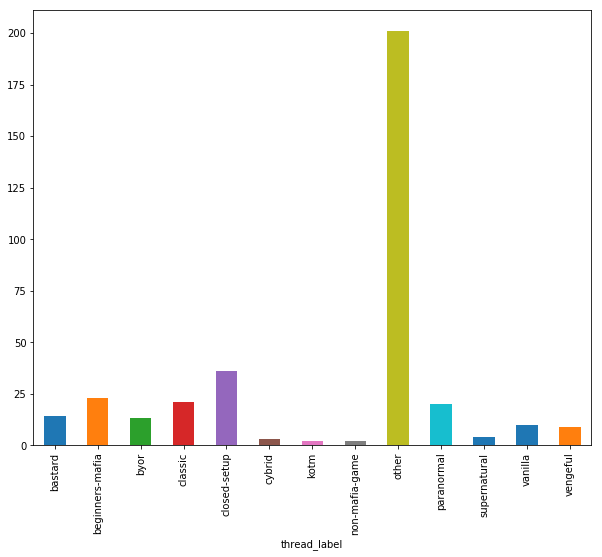

In [4]:
fig = plt.figure(figsize=(10,8))
thread.groupby('thread_label').thread_replies.count().plot.bar(ylim=0)
plt.show()

In [5]:
lbl_stats[lbl_stats["threads"]<5]

,,threads,posts,avg posts per thread
thread_label,thread_label_id,,,
cybrid,5,3,958,319
kotm,6,2,1719,859
non-mafia-game,7,2,673,336
supernatural,10,4,1565,391


In [6]:
label_map.loc[lbl_stats[lbl_stats["threads"]<5].index.get_level_values('thread_label').tolist()]["description"].tolist()

['A custom, titled mafia game with multiple "evil" factions and roles, with a sci-fi flavor.',
 '"King of the Mafia": multiple mafia mini-games (of the Kingmaker format) to determine the title of the subforum.',
 'Games which are sufficiently different from Mafia to be "related", but not counted as actual Mafia games.',
 'A custom, titled mafia game with hidden (but consistent) roles and a "supernatural beings" theme.']

In [17]:
quotes=post[post["quotes"]!="[]"]
print(quotes.iloc[0]["quotes"],"\n",quotes.iloc[0]["text"])

['Well, the game\'s started now.\xa0 Good luck, Liberals .Warning: Setup may contain copious amounts of fun.'] 



*Dun dun DUNNNNN*


In [18]:
quotes

,thread_num,user,text,quotes
14,45016,dakarian,QUOTED_SECTION \r\r\r\nShould I be using The ...,"['Well, the game\'s started now.\xa0 Good luck..."
18,45016,Vector,QUOTED_SECTION \r\r\r\nI might join one if I ...,['Tch. Like it will happen. Noone likes my maf...
19,45016,Org,QUOTED_SECTION Huh.\r\r\r\nThey arent any gam...,"['Quote from: Org on November 19, 2009, 07:41:..."
20,45016,Vector,QUOTED_SECTION \r\r\r\nCobaltKobold started t...,"['Quote from: Vector on November 19, 2009, 07:..."
25,45016,Vector,QUOTED_SECTION \r\r\r\nHow's that? We've got...,['This topic does not seem to be solving its p...
28,45016,Zai,QUOTED_SECTION \r\r\r\nDak. You need to host ...,['Remember the rule: I\'m permanently IN on al...
34,45016,Vector,"QUOTED_SECTION \r\r\r\nWow, I'd love to play ...","['It won\'t be for a very good while yet, but ..."
35,45016,Pandarsenic,QUOTED_SECTION,"['Quote from: Leafsnail on November 21, 2009, ..."
40,45016,CobaltKobold,"QUOTED_SECTION Do what I did, get a co-mod/so...",['I\'ll create a discussion thread if there\'s...
42,45016,Zai,QUOTED_SECTION \r\r\r\nYou've never heard the...,['Sounding board?']


In [19]:
print(len(quotes), len(post))

33983 97539
